A Taylor series is a mathematical construct which takes a non-polynomial function (also known as a transcendent function) and turns it into an infinite series of polynomials. A Taylor series of the function $f(x)$ which is inifintiely derivable when $x=a$  looks something like this:

$$
f(a) + \frac{f'(a)(x-a)}{1!} + \frac{f''(a)(x-a)^2}{2!} + \frac{f'''(a)(x-a)^3}{3!}...
$$



This can be used to approximate the derivative of a function if it cannot be found through the more typical methods.  Let us assume the function $f(x)$ creates the line below. To find the derivative at $x=c$ we  will need the Taylor series of $f(c-h)$ and $f(c+h) in addtion to the Taylor series of $f(c)$. 

![Approximation](Function.PNG)

First, we will set the first two terms of the Taylor series to equal $0$, then we will do the same for the Taylor series of $f(c-h)$ and $f(c+h)$. This will create the following Taylor series:

$$
f(c) +f'(c)(x-c) = 0
$$

$$
f(c-h) +f'(c-h)(x-c+h) = 0
$$

$$
f(c+h) +f'(c+h)(x-c-h) = 0
$$

After some algebraic manipulation, we have our derivative:

$$
f'(c) = \frac{f(c+h)-f(c-h)}{2h}
$$

A similar process can be done with the second derivative to find:

$$
f''(c) = \frac{f(c+h)-2f(c)-f(c-h)}{h^2}
$$

Now we must translate the math into code to find the error values for this method compared to calculating the derivative like normal. First, we will import `NumPy` and `MatPlotLib` then we will define three spaces from 0 to 1, each with different sets of values in them. We will also define the exponent value as 8.

Then we will define our function, which will create additional spaces to be set as a list of zeros equal in length to the x-space. Then, for each value in the x-space, we will set a corresponding value in another space equal to the x-value after is has been appropriately manipulated. Each for loop is a different function: the calculation of the initial $f(x)$, the derivative of $f$ found through the Taylor series, the derivative of $f$ calculated through differentiation, etc. 

Then the difference between $f'$ from the Taylor series and $f'$ is calculated for each point, and the same is done for the second derivative. This is returned and graphed. 

In [91]:
import numpy as np
import matplotlib.pyplot as plt

xVals1 = np.linspace(0,1,11)
xVals2 = np.linspace(0,1,51)
xVals3 = np.linspace(0,1,101)
#print(xVals)

exp = 8
def findDervDiff(exp,xVals):
    yVals = np.zeros_like(xVals)
    firDerVals = np.zeros_like(xVals)
    secDerVals = np.zeros_like(xVals)
    calcFirDerVals =np.zeros_like(xVals)
    calcSecDerVals = np.zeros_like(xVals)

    for i in range(len(xVals)):
        yVals[i] = xVals[i]**exp
    
    
    for i in range(1,(len(xVals)-1)):
        firDerVals[i] = (yVals[i+1]-yVals[i-1])/(xVals[i+1]-xVals[i-1])
        
    for i in range(1,(len(xVals)-1)):
        secDerVals[i] = (yVals[i+1]-2*yVals[i]-yVals[i-1])/((xVals[i+1]-xVals[i-1])/2)**2
        
    dervExp = exp -1
    dervCoeff = exp
    secExp = exp-2
    secCoeff = exp-1* dervCoeff
    
    
    for i in range(1, len(xVals)-1):
        calcFirDerVals = dervCoeff*(xVals[i]**dervExp)
        
    for i in range(1, len(xVals)-1):
        calcSecDerVals = secCoeff*xVals[i]**secExp 
    
    firstDiff = firDerVals - calcFirDerVals
    secDiff = secDerVals - calcSecDerVals
    
    #print(firDerVals)
    #print(calcFirDerVals)
    #print(firstDiff)
    #print(secDiff)
    return secDiff,xVals
    #print(xVals, yVals)
    #print(xVals, yVals, firDerVals, secDerVals)
    
sec1, x1 = findDervDiff(8,xVals1)
sec2, x2 = findDervDiff(8, xVals2)
sec3, x3 = findDervDiff(8, xVals3)

Text(0.5, 1.0, 'X-Values vs. Second Derivative Error of x^8')

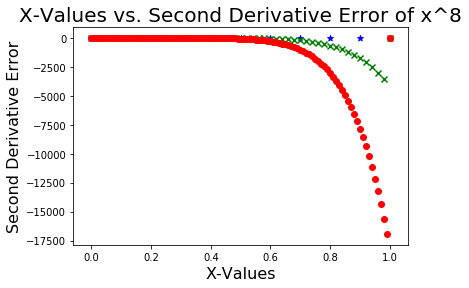

In [92]:
fig, axes = plt.subplots()

axes.scatter(x1,sec1,c='b',marker='*')
axes.scatter(x2,sec2,c = 'g', marker = 'x')
axes.scatter(x3,sec3, c = 'r', marker = 'o')
axes.set_xlabel('X-Values', fontsize=16)
axes.set_ylabel('Second Derivative Error', fontsize=16)
axes.set_title('X-Values vs. Second Derivative Error of x^8',fontsize=20)


As shown in the graph above, as $h$ decreases in value the magniture of the errors decreases. The error is always roughly equal to the first term of the Taylor series not included in our calculations.